# Homework 02 - Perceptron and MLP


### Perceptron
* Implement perceptron in NumPy.
* Train it on AND, XOR gate.
* Visualize the training progress.


### MLP
* Answer basic questions about a simple MLP.
* Assign variable names to parts of the MLP.
* Perform a forward step by hand.

## 1. Perceptron

In [1]:
import numpy as np

In [2]:
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])
# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

#### Implement Perceptron.

In [3]:
# To make you familiar with classes we will implement the perceptron as a class.
# Check https://docs.python.org/3/tutorial/classes.html if you need basic help with python classes.

class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        ### YOUR CODE HERE ###
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(self.input_units)
        self.bias = np.random.randn(1)
        # 2. Define the learning rate as 0.01.
        self.alpha = 0.01
        ######################
        
    def forward_step(self, data):
        ### YOUR CODE HERE ###
        # Perform a perceptron forward step.
        # 1. Calculate the drive. Check the meaning of '@' in NumPy.
        drive = self.weights @ data + self.bias
        # 2. Return a 1 or a 0, depending on whether the perceptron surpassed the threshold. 
        # You can use 'int(...)' to make an integer out of a boolean.
        return int(drive >= 0)        
        ######################
        
    def training_step(self, data, label):
        ### YOUR CODE HERE ###
        # Perform a whole training step (including the forward step).
        # 1. Forward step.
        output = self.forward_step(data)
        # 2. Calculate the weight updates.
        updates_w = self.alpha * (label - output) * data
        # 3. Calculate the bias update. (If you are unsure have a look at slide 14. What is the input to the bias weight?)
        updates_b = self.alpha * (label - output) * 1
        # 4. Update weights and bias.
        self.weights += updates_w
        self.bias += updates_b
        #######################    

#### Train on AND gate.

In [9]:
# Now let's train the perceptron.

# Choose which target you want to train on.
t = t_and
# Initialize a perceptron.
perceptron = Perceptron(2)
# Initialize lists to store steps and performance.
steps = []
accuracies = []

# We train for 500 steps.
for i in range(500):
    steps.append(i)
    
    ### YOUR CODE HERE ###
    # 1. Draw a random sample from x and the corresponding t. Check 'np.random.randint'.
    n = np.random.randint(4)
    xt = x[n]
    tt = t[n]
    # 2. Perform a training step.
    perceptron.training_step(xt,tt)
    ######################
    
    # Calculate the performance over all four possible inputs.
    accuracy_sum = 0
    for k in range(4):
        output = perceptron.forward_step(x[k])
        accuracy_sum += int(output == t[k])
    accuracy = accuracy_sum/4
    accuracies.append(accuracy)

#### Visualize training progress.

<IPython.core.display.Javascript object>


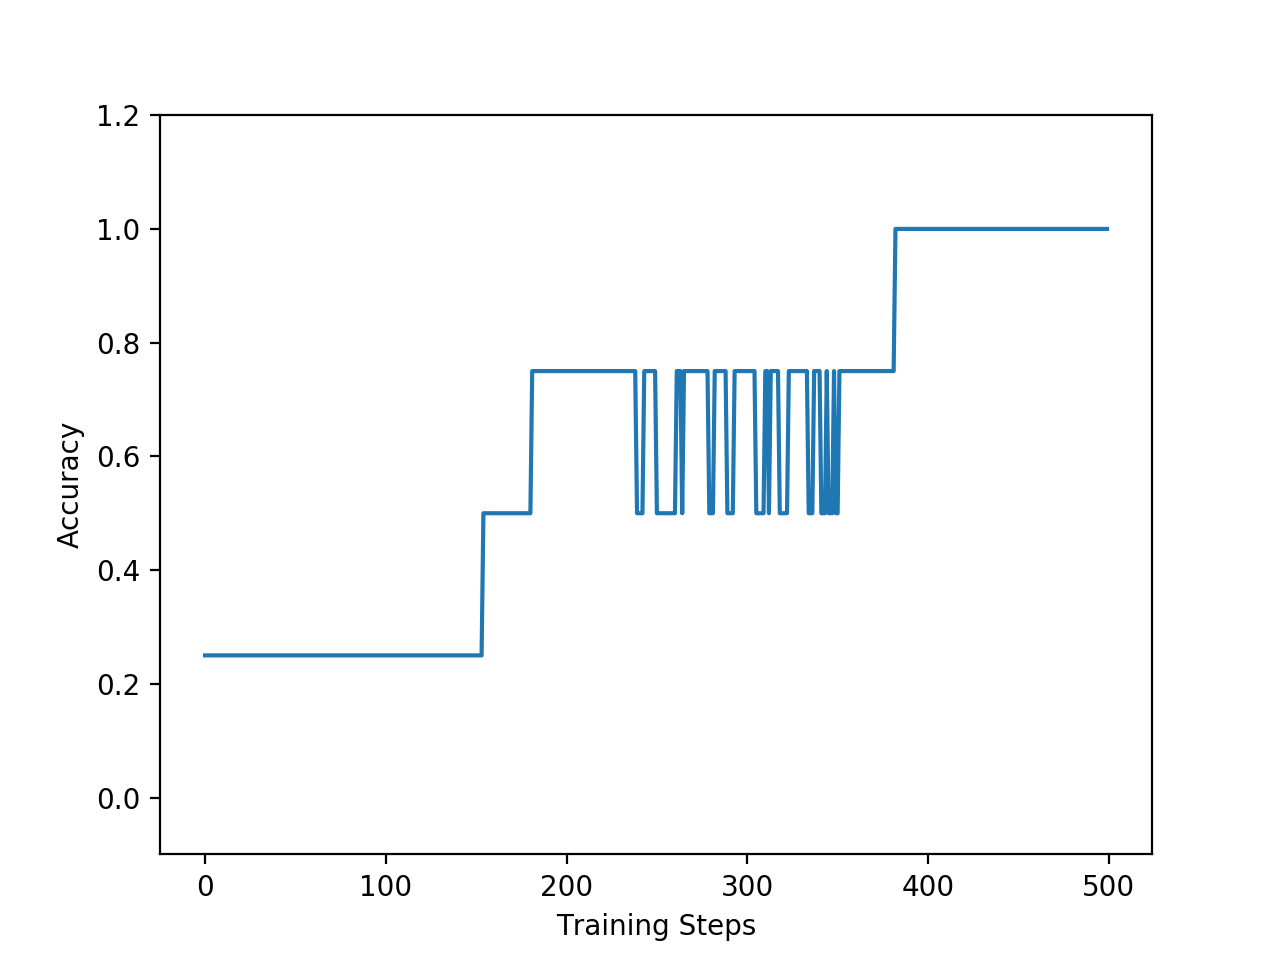

In [10]:
# Lastly let's plot the training progress.
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

#### Train on XOR gate.

In [11]:
# Now let's train the perceptron.

# Choose which target you want to train on.
t = t_xor
# Initialize a perceptron.
perceptron = Perceptron(2)
# Initialize lists to store steps and performance.
steps = []
accuracies = []

# We train for 500 steps.
for i in range(500):
    steps.append(i)
    
    n = np.random.randint(4)
    xt = x[n]
    tt = t[n]
    perceptron.training_step(xt,tt)
    
    accuracy_sum = 0
    for k in range(4):
        output = perceptron.forward_step(x[k])
        accuracy_sum += int(output == t[k])
    accuracy = accuracy_sum/4
    accuracies.append(accuracy)

#### Visualize training progress.

<IPython.core.display.Javascript object>


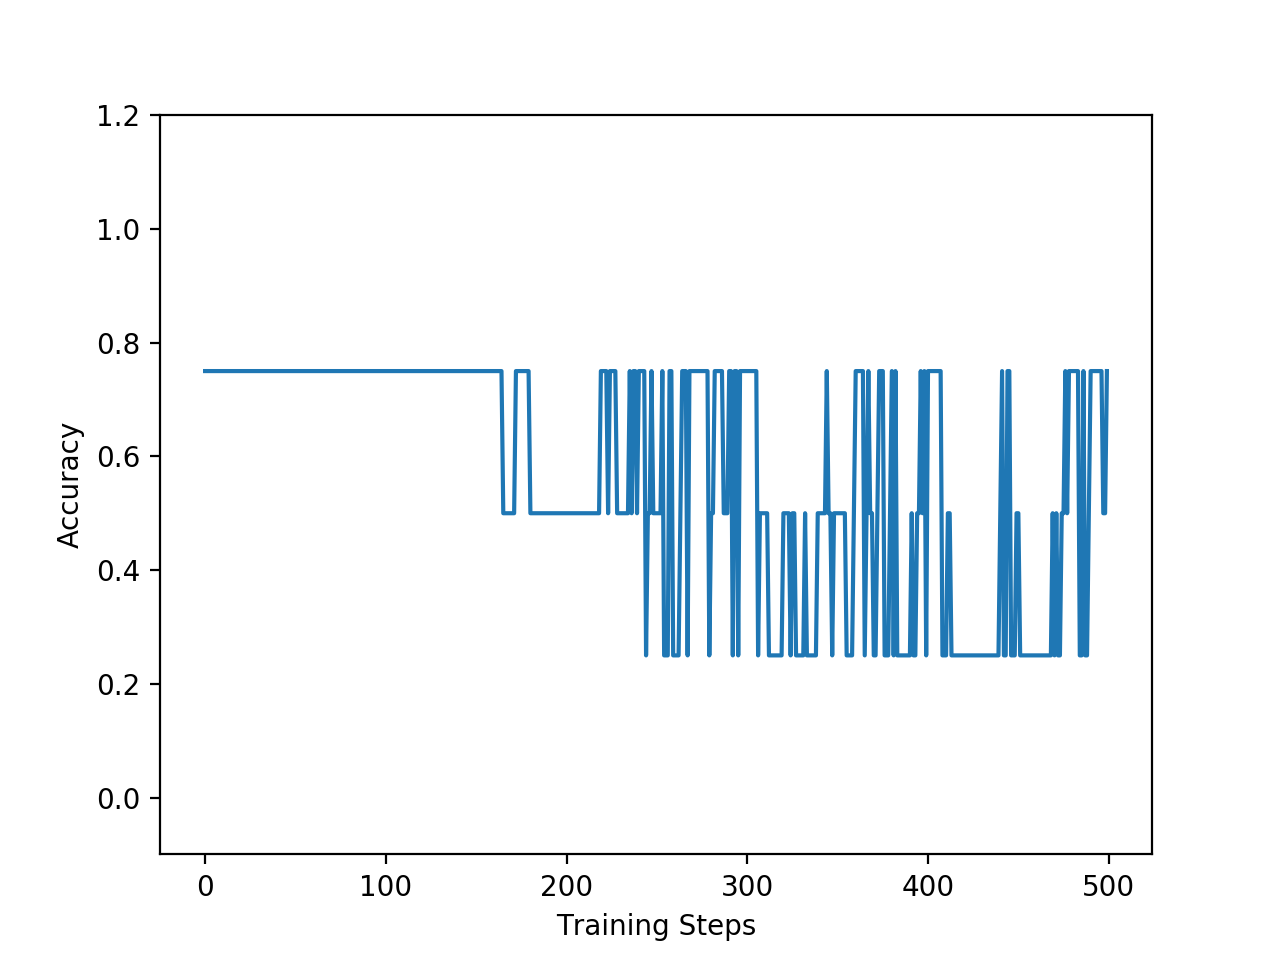

In [12]:
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

## 2. MLP

**Consider the following multi-layer perceptron:**
![MLP](https://raw.githubusercontent.com/lukeeffenberger/IANNWTF-2019/master/homework-figures/mlp.png)
**Please start by answering the following simple questions**

**Q**: *How many hidden layers does this MLP have?*  
**A**: 1

**Q**: *How many layers does this MLP have?*    
**A**: 2

**Q**: *Out of how many perceptrons is this network built?*  
**A**: 3

**Q**: *How many input, hidden and output neurons does this network have?*    
**A**: 2, 2, 1

**Given an input** $\vec{x} \in \mathbb{R}^2$ **the network function is defined as:**

$$y = (\vec{w}^{(2)}(W^{(1)} \vec{x})^2)^2 \hspace{325pt}$$

**where**
$$W^{(1)} = \begin{pmatrix} 3 & 1 \\ -1 & 2 \end{pmatrix}, \vec{w}^{(2)} = \begin{pmatrix} -1 \\ 1 \end{pmatrix}. \hspace{325pt}$$

**Q**: *What is the activation function* $\sigma$ *in this MLP?*  
**A**: $\sigma(x) = x^2$


**Now given the input**

$$\vec{x} = \begin{pmatrix} 2 \\ -1 \end{pmatrix} \hspace{400pt}$$

**compute the forward step. Given the the drawing from above,**  
**the input and the network function assign to each number the**   
**correct variable name (e.g.** $x_1$**) and the correct value that this**  
**variable has in this forward step.**

#### Calculations
$$ \vec{d}^{(1)} = \begin{pmatrix} d_1^{(1)} \\ d_2^{(1)} \end{pmatrix} = W^{(1)} \vec{x} = \begin{pmatrix} 3 & 1 \\ -1 & 2 \end{pmatrix} \begin{pmatrix} 2 \\ -1 \end{pmatrix} = \begin{pmatrix} 5 \\ -4 \end{pmatrix}   $$

$$ \vec{a}^{(1)} = \sigma( \vec{d}^{(1)}) = \begin{pmatrix} \sigma(d_1^{(1)}) \\ \sigma(d_2^{(1)}) \end{pmatrix} = \begin{pmatrix} 5^2 \\ (-4)^2 \end{pmatrix} = \begin{pmatrix} 25 \\ 16 \end{pmatrix} $$

$$ d^{(2)} = \vec{w}^{(2)} \vec{a}^{(1)} = \begin{pmatrix} -1 \\ 1 \end{pmatrix} \cdot \begin{pmatrix} 25 \\ 16 \end{pmatrix} = -25 + 16 = -9 $$

$$ y = \sigma(d^{(2)}) = (-9)^2 = 81 $$



| Number | Variable | Value |
|:------:|:--------:|:-----:|
|   1    |    $x_1$      |   2    |
|   2    |    $x_2$      |   -1    |
|   3    |    $w_{11}^{(1)}$      |   3   |
|   4    |    $w_{21}^{(1)}$      |   -1   |
|   5    |    $w_{12}^{(1)}$     |    1   |
|   6    |    $w_{22}^{(1)}$      |   2    |
|   7    |    $d_1^{(1)}$      |    5   |
|   8    |    $d_2^{(1)}$      |    -4   |
|   9    |    $a_1^{(1)}$      |    25   |
|  10    |    $a_2^{(1)}$      |    16   |
|  11    |    $w_{1}^{(2)}$      |   -1    |
|  12    |    $w_{2}^{(2)}$      |   1    |
|  13    |    $d^{(2)}$       |   -9    |
|  14    |    $y$       |    81   |
